Scratch Jupyter Noteboook

In [45]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import tqdm
import nonlinear_approximator as na
from importlib import reload
import torch
import torchvision
import PIL
%matplotlib inline

# Load and Plot MNIST Dataset 

In [47]:
def one_hot_ten(int_label: torch.Tensor) -> NDArray[np.floating]:
    oh = np.zeros((10,))
    oh[int_label] = 1
    return oh

def to_numpy_arr(img: PIL.Image) -> NDArray[np.floating]:
    return np.asarray(img).flatten()


In [48]:
train_data = torchvision.datasets.MNIST(root='./data', download=True, train=True, transform=to_numpy_arr, target_transform=one_hot_ten)
test_data = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=to_numpy_arr, target_transform=one_hot_ten)

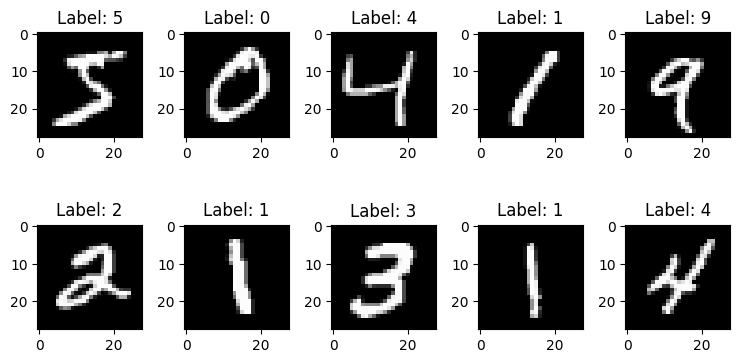

In [51]:
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols,2*num_rows))
for i in range(num_rows*num_cols):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(train_data[i][0].reshape((28, 28)), cmap='gray')
    ax.set_title('Label: {}'.format(np.argmax(train_data[i][1])))
plt.tight_layout()
plt.show()

# Parameters

In [58]:
config = na.params.RegressionParams(
    width=1000,
    depth=50,
    input_dimension=len(train_data[0][0]),
    transform_type=na.activations.TransformType.TENT,
    transform_params=na.params.TentParams(mu=1.99),
    output_dimension=len(train_data[0][1]),
)

# Instantiate Model


In [59]:
model = na.model.NonlinearRegressorModel(config)

# Train an XOR Decoder

(784, 60000)

In [ ]:
imgs_train, labels_train = zip(*train_data)
imgs_train = np.asarray(imgs_train).T
labels_train = np.asarray(labels_train).T

model.fit(imgs_train[:, :1000], labels_train[:,:1000].T)

100%|██████████| 1000/1000 [03:22<00:00,  4.93it/s]


In [101]:
probs = model.predict(imgs_train[:,:1000])

100%|██████████| 1000/1000 [00:01<00:00, 664.03it/s]


In [ ]:
labels_pred_train = np.argmax(probs, axis=-1)
np.argmax(probs, axis=-1).shape, probs.shape
plt.hist(labels_pred_train)
plt.hist(labels_train[:1000])


(array([[9., 0., 0., ..., 0., 0., 1.],
        [9., 0., 0., ..., 0., 0., 1.],
        [9., 0., 0., ..., 0., 0., 1.],
        ...,
        [9., 0., 0., ..., 0., 0., 1.],
        [9., 0., 0., ..., 0., 0., 1.],
        [9., 0., 0., ..., 0., 0., 1.]], shape=(60000, 10)),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 60000 BarContainer objects>)

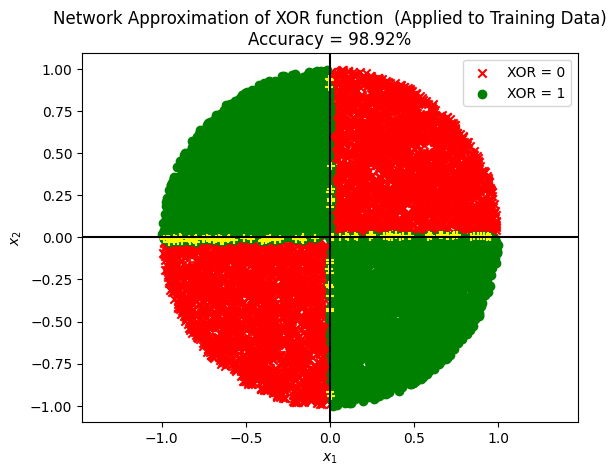

In [16]:
xor_thresh = 0.5

xors_train_rounded = outputs.mean(axis=2).copy()
xors_train_rounded[xors_train_rounded <= xor_thresh] = 0
xors_train_rounded[xors_train_rounded > xor_thresh] = 1
xor_train_actual = np.array(
    [xor(train_samples[:, i]) for i in range(train_samples.shape[1])]
)


mask_0 = np.isclose(xors_train_rounded, 0).squeeze()
mask_1 = np.isclose(xors_train_rounded, 1).squeeze()
plt.scatter(
    train_samples[0, mask_0],
    train_samples[1, mask_0],
    c="red",
    marker="x",
    label="XOR = 0",
)
plt.scatter(
    train_samples[0, mask_1],
    train_samples[1, mask_1],
    c="green",
    marker="o",
    label="XOR = 1",
)

mask_incorrect = (xors_train_rounded != xor_train_actual).squeeze()
plt.scatter(
    train_samples[0, mask_incorrect],
    train_samples[1, mask_incorrect],
    marker="+",
    c="yellow",
)

plt.axis("equal")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")

plt.title(
    f"Network Approximation of XOR function  (Applied to Training Data)\nAccuracy = {100 * (1 - sum(mask_incorrect) / num_samples_train)}%"
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()


# Test XOR Approximation

100%|██████████| 1000/1000 [00:02<00:00, 388.67it/s]


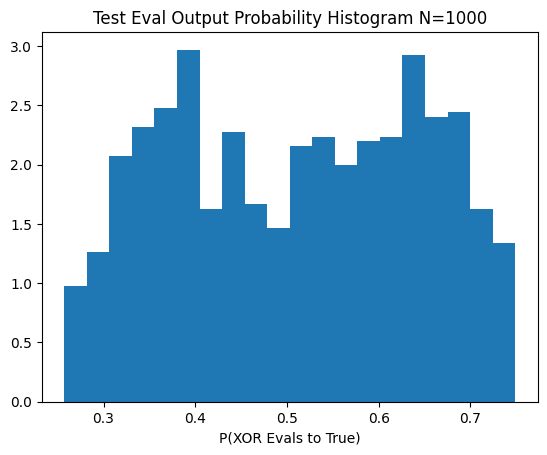

In [18]:
outputs_test = infer(test_samples, neurons, decoders, config)
#  (D x S) x (D x Y).T @ (D x S) ==> Y x
plt.hist(outputs_test.mean(axis=2).T, 20, density=True)
plt.title(f"Test Eval Output Probability Histogram N={test_samples.shape[1]}")
plt.xlabel("P(XOR Evals to True)")
plt.show()

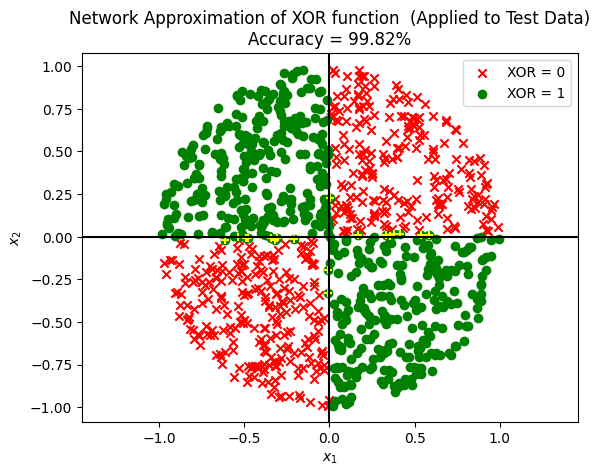

In [19]:
xor_thresh = 0.5

xors_test_rounded = outputs_test.mean(axis=2).copy()
xors_test_rounded[xors_test_rounded <= xor_thresh] = 0
xors_test_rounded[xors_test_rounded > xor_thresh] = 1
xors_test_actual = np.array(
    [xor(test_samples[:, i]) for i in range(test_samples.shape[1])]
)


mask_0 = np.isclose(xors_test_rounded, 0).squeeze()
mask_1 = np.isclose(xors_test_rounded, 1).squeeze()
plt.scatter(
    test_samples[0, mask_0],
    test_samples[1, mask_0],
    c="red",
    marker="x",
    label="XOR = 0",
)
plt.scatter(
    test_samples[0, mask_1],
    test_samples[1, mask_1],
    c="green",
    marker="o",
    label="XOR = 1",
)

mask_incorrect = (xors_test_rounded != xors_test_actual).squeeze()
plt.scatter(
    test_samples[0, mask_incorrect],
    test_samples[1, mask_incorrect],
    marker="+",
    c="yellow",
)

plt.axis("equal")
plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")

plt.title(
    f"Network Approximation of XOR function  (Applied to Test Data)\nAccuracy = {100 * (1 - sum(mask_incorrect) / num_samples_train)}%"
)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()